Linear Regression

In [1]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # For model saving

In [2]:
# Step 2: Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Step 3: Explore the dataset
print(df.info())
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

In [4]:
# Step 4: Prepare the data
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


In [5]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 6: Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Step 7: Make predictions
y_pred = lr_model.predict(X_test)

In [8]:
# Step 8: Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression R² Score:", r2)
print("Linear Regression RMSE:", rmse)

Linear Regression R² Score: 0.575787706032451
Linear Regression RMSE: 0.7455813830127763


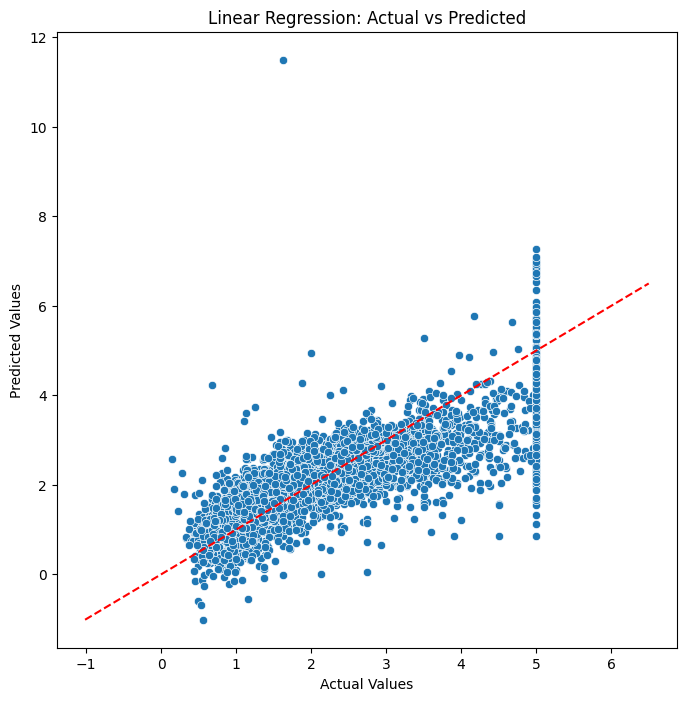

In [9]:
# Step 9: Visualize actual vs predicted
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
line_start = min(y_test.min(), y_pred.min())
line_end = max(y_test.max()-5, y_pred.max()-5)
plt.plot([line_start, line_end], [line_start, line_end], color='red', linestyle='--')
plt.show()




Ridge and Lasso

In [21]:
# Step 9: Ridge & Lasso Models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=0.1, random_state=42)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [22]:
# Step 10: Evaluate Ridge & Lasso
for name, model in [("Ridge", ridge), ("Lasso", lasso)]:
    y_pred_reg = model.predict(X_test)
    print(f"{name} R²:", r2_score(y_test, y_pred_reg))
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))

Ridge R²: 0.5758549611440126
Ridge RMSE: 0.7455222779992702
Lasso R²: 0.5318167610318159
Lasso RMSE: 0.7832697618354822


In [16]:
# Step 11: Hyperparameter tuning for Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10, 100]}
grid = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best alpha (Ridge):", grid.best_params_)

Best alpha (Ridge): {'alpha': 10}


In [25]:
# Step 12: Save model & predictions
joblib.dump(ridge, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\LinearRegression_ridge_model.pkl")
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
pred_df.to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Datasets\\LinearRegression_Predictions.csv", index=False)
